## 1. Prepare data

### 1.1 Load real data example

In [1]:
using TorusEvol
using Distributions

# Underlying evolutionary process
t_Y = 2.3; t_Z=2.2; t_W=2.2
λ=0.008; μ=0.0203; r=0.4
τ = TKF92([t_Y+t_Z], λ, μ, r)
S = WAG_SubstitutionProcess()
μ_𝜙=-1.0; μ_𝜓=-0.8; σ_𝜙=0.8; σ_𝜓=0.8; α_𝜙=0.5; α_𝜓=1.0; α_cov=0.1; γ=0.2
Θ = JumpingWrappedDiffusion(μ_𝜙, μ_𝜓, σ_𝜙, σ_𝜓, α_𝜙, α_𝜓, α_cov, γ)
ξ = ProductProcess(S, Θ)
Γ = ChainJointDistribution(ξ, τ)

chainY = from_pdb("1MBN", "A"); Y = slice(data(chainY), :, [1, 2])
chainZ = from_pdb("1A3N", "A"); Z = slice(data(chainZ), :, [1, 2])
chainW = from_pdb("1OJ6", "A"); W = slice(data(chainW), :, [1, 2])
render(chainY, chainZ, chainW)

[ Info: File exists: 1MBN
[ Info: File exists: 1A3N
[ Info: File exists: 1OJ6
[ Info: Superimposing based on a sequence alignment between 141 residues
[ Info: Superimposing based on 141 atoms
[ Info: Superimposing based on a sequence alignment between 111 residues
[ Info: Superimposing based on 111 atoms
[ Info: Model 1 with 3 chains (1,2,3), 441 residues, 3706 atoms


HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

In [2]:
τ_XYZ = TKF92([t_Y, t_Z], λ, μ, r; known_ancestor=false)
Γ = ChainJointDistribution(ξ, τ_XYZ)
α_YZ = get_α(τ_XYZ, (Y, Z))
lp = logpdfα!(α_YZ, Γ, (Y, Z)); print(lp)

c = ConditionedAlignmentDistribution(τ_XYZ, α_YZ; max_length=800)
M_XYZ_data = rand(ConditionedAlignmentDistribution(τ_XYZ, α_YZ)); M_XYZ = Alignment(M_XYZ_data, [1, 2, 3], τ_XYZ);
#print(M_XYZ)

-1700.6919523339645

In [3]:
using LogExpFunctions
X = hiddenchain_from_alignment(Y, Z, t_Y, t_Z, M_XYZ, ξ)
α_XW = get_α(TKF92([t_W], λ, μ, r; known_ancestor=true), [X, W])
τ_XW = TKF92([t_W], λ, μ, r; known_ancestor=true)
C_XW = ChainTransitionDistribution(ξ, τ_XW, X)
logpdfα!(α_XW, C_XW, W)
cxw = ConditionedAlignmentDistribution(τ_XW, α_XW)
M_XW = Alignment(rand(cxw), [1, 4], τ_XW)
M_XYZW = combine(1, M_XYZ, M_XW)
    
M_YZW = subalignment(M_XYZW, [2, 3, 4])
show_filled_alignment(M_YZW, id_to_aa.(data(Y)[1]), id_to_aa.(data(Z)[1]), id_to_aa.(data(W)[1]))


VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPET--LEKFDRFKH-LK-TEAEMKASEDLKKHGVTVLTA
VLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTT--KTYF---PHFDL-S----HGSAQVKGHGKKVADA
RPEP---ELIRQSWRAVSRSPLEHGTVLFARLFALEPDLLPLFQYN--GR-QFSSPEDSLSSPEFLDHIRKVMLV

LGAILKKKGHHEAELKPLAQSHATK--HKIPIKYLEFISEAIIHVLHSRHPGDFGADAQGAMNKALELFRKDIAA
LTNAVAHVDDMPNALSALSDLHAHK--LRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASV-----S
IDAAVTNVEDLSSLEEYLASLGRKHRAVGVKLSSFSTVGESLLYMLEKSLGPAFTPATRAAWSQLYGAV-----V

KYKELGYQG
TVLTSKYR-
QAMSRGWD-



## 2. Parameter Inference Bayesian Model

### 2.1 Set up priors for evolutionary processes

In [4]:
using Turing, DynamicPPL
using LinearAlgebra
using LogExpFunctions 
using Plots, StatsPlots
using Random

import Base: length, eltype
import Distributions: _rand!, logpdf

Turing.setprogress!(true)

struct ScaledBeta <: ContinuousUnivariateDistribution 
    be::Beta 
    function ScaledBeta(α::Real, β::Real)
        new(Beta(α, β))
    end
end
Distributions.rand(rng::AbstractRNG, d::ScaledBeta) = rand(d.be)*2 - 1
Distributions.logpdf(d::ScaledBeta, x::Real) = logpdf(d.be, (x+1) / 2)


struct CompetingExponential <: ContinuousMultivariateDistribution 
    ex::Exponential
    function CompetingExponential(rate::Real)
        new(Exponential(rate))
    end
end 
Base.eltype(d::CompetingExponential) = Float64 
Base.length(d::CompetingExponential) = 2

function Distributions._rand!(rng::AbstractRNG, d::CompetingExponential, x::AbstractVector{<:Real})
    λ = rand(rng, d.ex)
    μ = rand(rng, d.ex)
    if λ > μ 
        tmp = λ; λ = μ; μ=tmp 
    end
    x .= [λ, μ]
    return x
end

function Distributions._logpdf(d::CompetingExponential, x::AbstractArray)
    if x[1] > x[2]
        return -Inf
    end
    return log(2) + logpdf(d.ex, x[1]) + logpdf(d.ex, x[2])
end

@model function tkf92_prior()
    λμ ~ CompetingExponential(0.1)
    λ = λμ[1]; μ = λμ[2]
    r ~ Uniform(0.0, 1.0)

    # Require birth rate lower than death rate
    if λ > μ || λ ≤ 0 || μ ≤ 0 || r ≤ 0 || r ≥ 1
        μ = NaN; λ = NaN
    end
    return λ, μ, r
end;

@model function jwndiff_prior()
    μ ~ filldist(Uniform(-π, π), 2)
    σ² ~ filldist(Gamma(π * 0.1), 2)
    α ~ filldist(Gamma(π * 0.1), 2)
    γ ~ Exponential(1.0)   # jumping rate
    α_corr ~ ScaledBeta(3, 3)
    
    # Require valid covariance matrices
    if any(σ² .≤ 0) || any(α .≤ 0) || γ ≤ 0 
        σ² .= NaN; α .= NaN; γ = NaN
    end
    α_cov = α_corr * sqrt(α[1] * α[2])
    if α_cov^2 > α[1]*α[2]
         α_cov = NaN
    end
    
    return μ[1], μ[2], sqrt(σ²[1]), sqrt(σ²[2]), α[1], α[2], α_cov, γ
end;

[ Info: [Turing]: progress logging is enabled globally
[ Info: [AdvancedVI]: global PROGRESS is set as true


### 2.2 Set up sampler

In [5]:
torus_proposal(v) = MixtureModel([WrappedNormal(v, I), WrappedNormal(v, 20*I)], [0.8, 0.2])
mv_rw_proposal(v::AbstractVector, cov) = MvNormal(v, cov)
rw_proposal(x, var) = Normal(x, var)


t_samplers = [MH(:t_Y => v -> rw_proposal(v, 0.2)), 
              MH(:t_Z => v -> rw_proposal(v, 0.2)),
              MH(:t_W => v -> rw_proposal(v, 0.2))]

Θ_samplers = [MH(Symbol("Θ.μ") => v -> torus_proposal(v)),
              MH(Symbol("Θ.σ²") => v -> mv_rw_proposal(v, 0.4*I)),
              MH(Symbol("Θ.α") => v -> mv_rw_proposal(v, 0.4*I)),
              MH(Symbol("Θ.α_corr") => x -> rw_proposal(x, 0.5)),
              MH(Symbol("Θ.γ") => x -> rw_proposal(x, 0.5))]

τ_samplers = [MH(Symbol("τ.λμ") => v -> mv_rw_proposal(v, [0.4 0.1; 0.1 0.6])),
             MH(Symbol("τ.r") => x -> rw_proposal(x, 0.5))]

M_samplers = [MH(:M_XYZ, :M_XW)]
    
full_sampler = Gibbs(t_samplers..., Θ_samplers..., τ_samplers..., M_samplers...)
tM_sampler = Gibbs(t_samplers..., M_samplers...)

Gibbs{(:t_Y, :t_Z, :t_W, :M_XYZ, :M_XW), Tuple{MH{(:t_Y,), NamedTuple{(:t_Y,), Tuple{AdvancedMH.StaticProposal{false, var"#3#6"}}}}, MH{(:t_Z,), NamedTuple{(:t_Z,), Tuple{AdvancedMH.StaticProposal{false, var"#4#7"}}}}, MH{(:t_W,), NamedTuple{(:t_W,), Tuple{AdvancedMH.StaticProposal{false, var"#5#8"}}}}, MH{(:M_XYZ, :M_XW), NamedTuple{(), Tuple{}}}}}((MH{(:t_Y,), NamedTuple{(:t_Y,), Tuple{AdvancedMH.StaticProposal{false, var"#3#6"}}}}((t_Y = AdvancedMH.StaticProposal{false, var"#3#6"}(var"#3#6"()),)), MH{(:t_Z,), NamedTuple{(:t_Z,), Tuple{AdvancedMH.StaticProposal{false, var"#4#7"}}}}((t_Z = AdvancedMH.StaticProposal{false, var"#4#7"}(var"#4#7"()),)), MH{(:t_W,), NamedTuple{(:t_W,), Tuple{AdvancedMH.StaticProposal{false, var"#5#8"}}}}((t_W = AdvancedMH.StaticProposal{false, var"#5#8"}(var"#5#8"()),)), MH{(:M_XYZ, :M_XW), NamedTuple{(), Tuple{}}}(NamedTuple())))

### 2.3 Prepare probabilistic model

In [6]:
using TimerOutputs

@model function triple_param_inference_simple(Y, Z, W; max_N_X=200)
    N_Y = num_sites(Y); N_Z = num_sites(Z); N_W = num_sites(W)
    # ____________________________________________________________________________________________________
    # Step 1 - Sample prior parameters
    
    # Time parameters
    t_Y ~ Exponential(1.0) 
    t_Z ~ Exponential(1.0) 
    t_W ~ Exponential(1.0) 
    
    # Alignment parameters
    @submodel prefix="τ" Λ = tkf92_prior()
    # Dihedral parameters 
    @submodel prefix="Θ" Ξ = jwndiff_prior()
    # Check parameter validity 
    if t_Y ≤ 0 || t_Z ≤ 0 || t_W ≤ 0 || any(isnan.(Ξ)) || any(isnan.(Λ))
        Turing.@addlogprob! -Inf; return
    end
    
    # ____________________________________________________________________________________________________
    # Step 2 - Construct site level process
    
    # Substitution Process - no parameters for simplicity, use fully empirical model
    S = WAG_SubstitutionProcess()
    # Dihedral Process
    Θ = JumpingWrappedDiffusion(Ξ...)
    # Joint sequence-structure site level process with one regime
    ξ = ProductProcess(S, Θ)
    
    # ____________________________________________________________________________________________________
    # Step 3 - Observe data and simultaneously construct alignment 
    
    # First, observe Y and Z and sample a triple alignment of X, Y and Z 
    τ_XYZ = TKF92([t_Y, t_Z], Λ...; known_ancestor=false)
    α_YZ = get_α(τ_XYZ, [Y, Z])
    Γ_YZ = ChainJointDistribution(ξ, τ_XYZ)
    # (Y, Z) ~ ChainJointDistribution(ξ, τ_XYZ)
    Turing.@addlogprob! logpdfα!(α_YZ, Γ_YZ, (Y, Z))
    
    M_XYZ = tzeros(Int, max_N_X + N_Y + N_Z)
    M_XYZ ~ ConditionedAlignmentDistribution(τ_XYZ, α_YZ; max_length=max_N_X + N_Y + N_Z)
    
    # Construct X, the hidden ancestor chain, given alignment M_XYZ and data Y, Z
    X = hiddenchain_from_alignment(Y, Z, t_Y, t_Z, Alignment(M_XYZ, τ_XYZ), ξ); N_X = num_sites(X)
    
    # Finally, observe W given X and sample alignment of X and W
    τ_XW = TKF92([t_W], Λ...; known_ancestor=true)
    α_XW = get_α(τ_XW, [X, W])
    Γ_XW = ChainTransitionDistribution(ξ, τ_XW, X)
    # W ~ ChainTransitionDistribution(ξ, τ_XW, X)
    Turing.@addlogprob! logpdfα!(α_XW, Γ_XW, W)
    M_XW = tzeros(Int, N_X + N_W)
    M_XW ~ ConditionedAlignmentDistribution(τ_XW, α_XW; max_length=N_X + N_W)
    
    full_alignment = combine(1, Alignment(M_XYZ, [1, 2, 3], τ_XYZ), Alignment(M_XW, [1, 4], τ_XW))
    print("times: XY: $t_Y, XZ: $t_Z, XW: $t_W \n")
    print("TKF92 params: $Λ \n")
    print("WNDiff params: $Ξ \n")
    show_filled_alignment(full_alignment, fill('#', N_X), id_to_aa.(data(Y)[1]), id_to_aa.(data(Z)[1]), id_to_aa.(data(W)[1]))
    return full_alignment
end;

In [7]:
using TimerOutputs

@model function triple_align_branches_inference(Y, Z, W; max_N_X=200)
    N_Y = num_sites(Y); N_Z = num_sites(Z); N_W = num_sites(W)
    # ____________________________________________________________________________________________________
    # Step 1 - Sample prior parameters
    
    # Time parameters
    t_Y ~ Exponential(1.0) 
    t_Z ~ Exponential(1.0) 
    t_W ~ Exponential(1.0)
    #t_Y = 0.5; t_Z=0.6; t_W=0.8
    
    # Alignment parameters
    Λ = (0.008, 0.0203, 0.4)
    # Dihedral parameters 
    Ξ = (-1.0, -0.8, 0.8, 0.8, 0.5, 1.0, 0.1, 0.2)
    
    # Check parameter validity 
    if t_Y ≤ 0 || t_Z ≤ 0 || t_W ≤ 0
        Turing.@addlogprob! -Inf; return
    end
    
    # ____________________________________________________________________________________________________
    # Step 2 - Construct site level process
    
    # Substitution Process - no parameters for simplicity, use fully empirical model
    S = WAG_SubstitutionProcess()
    # Dihedral Process
    Θ = JumpingWrappedDiffusion(Ξ...)
    # Joint sequence-structure site level process with one regime
    ξ = ProductProcess(S, Θ)
    
    # ____________________________________________________________________________________________________
    # Step 3 - Observe data and simultaneously construct alignment 
    
    # First, observe Y and Z and sample a triple alignment of X, Y and Z 
    τ_XYZ = TKF92([t_Y, t_Z], Λ...; known_ancestor=false)
    α_YZ = get_α(τ_XYZ, [Y, Z])
    Γ_YZ = ChainJointDistribution(ξ, τ_XYZ)
    # (Y, Z) ~ ChainJointDistribution(ξ, τ_XYZ)
    Turing.@addlogprob! logpdfα!(α_YZ, Γ_YZ, (Y, Z))
    
    M_XYZ = tzeros(Int, max_N_X + N_Y + N_Z)
    M_XYZ ~ ConditionedAlignmentDistribution(τ_XYZ, α_YZ; max_length=max_N_X + N_Y + N_Z)
    
    # Construct X, the hidden ancestor chain, given alignment M_XYZ and data Y, Z
    X = hiddenchain_from_alignment(Y, Z, t_Y, t_Z, Alignment(M_XYZ, τ_XYZ), ξ); N_X = num_sites(X)
    
    # Finally, observe W given X and sample alignment of X and W
    τ_XW = TKF92([t_W], Λ...; known_ancestor=true)
    α_XW = get_α(τ_XW, [X, W])
    Γ_XW = ChainTransitionDistribution(ξ, τ_XW, X)
    # W ~ ChainTransitionDistribution(ξ, τ_XW, X)
    Turing.@addlogprob! logpdfα!(α_XW, Γ_XW, W)
    M_XW = tzeros(Int, N_X + N_W)
    M_XW ~ ConditionedAlignmentDistribution(τ_XW, α_XW; max_length=N_X + N_W)
    
    #full_alignment = combine(1, Alignment(M_XYZ, [1, 2, 3], τ_XYZ), Alignment(M_XW, [1, 4], τ_XW))
    #print("times: XY: $t_Y, XZ: $t_Z, XW: $t_W \n")
    #print("TKF92 params: $Λ \n")
    #print("WNDiff params: $Ξ \n")
    #show_filled_alignment(full_alignment, fill('#', N_X), id_to_aa.(data(Y)[1]), id_to_aa.(data(Z)[1]), id_to_aa.(data(W)[1]))
    #return full_alignment
end;

### 2.4 Sample from the model and check results

In [17]:
num_samples = 1000
num_chains = 1
model = triple_align_branches_inference(Y, Z, W)
chain = sample(model, IS(), MCMCThreads(), num_samples, num_chains)

Chains MCMC chain (1000×836×1 reshape(::Matrix{Union{Missing, Float64}}, 1000, 836, 1) with eltype Union{Missing, Float64}):

Log evidence      = -1967.2884991938618
Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 3096.57 seconds
Compute duration  = 3096.57 seconds
parameters        = t_Y, t_Z, t_W, M_XYZ[1], M_XYZ[2], M_XYZ[3], M_XYZ[4], M_XYZ[5], M_XYZ[6], M_XYZ[7], M_XYZ[8], M_XYZ[9], M_XYZ[10], M_XYZ[11], M_XYZ[12], M_XYZ[13], M_XYZ[14], M_XYZ[15], M_XYZ[16], M_XYZ[17], M_XYZ[18], M_XYZ[19], M_XYZ[20], M_XYZ[21], M_XYZ[22], M_XYZ[23], M_XYZ[24], M_XYZ[25], M_XYZ[26], M_XYZ[27], M_XYZ[28], M_XYZ[29], M_XYZ[30], M_XYZ[31], M_XYZ[32], M_XYZ[33], M_XYZ[34], M_XYZ[35], M_XYZ[36], M_XYZ[37], M_XYZ[38], M_XYZ[39], M_XYZ[40], M_XYZ[41], M_XYZ[42], M_XYZ[43], M_XYZ[44], M_XYZ[45], M_XYZ[46], M_XYZ[47], M_XYZ[48], M_XYZ[49], M_XYZ[50], M_XYZ[51], M_XYZ[52], M_XYZ[53], M_XYZ[54], M_XYZ[55], M_XYZ[56], M_XYZ[57], M_XYZ[58], M_XYZ[59], M_XYZ[60], 

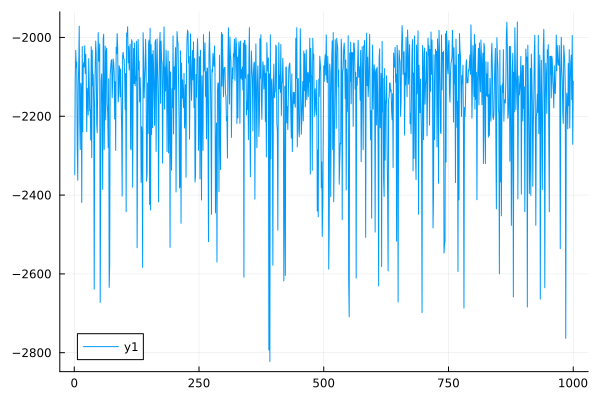

In [18]:
lps = vec(collect(MCMCChains.group(chain, :lp).value))
plot(lps)

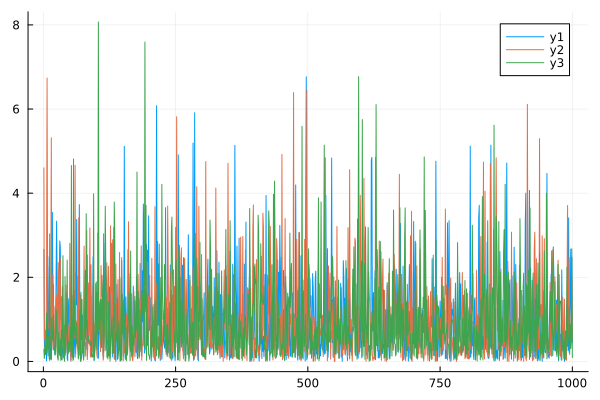

In [19]:
t_Z = vec(collect(MCMCChains.group(chain, :t_Z).value))
t_W = vec(collect(MCMCChains.group(chain, :t_W).value))
t_Y = vec(collect(MCMCChains.group(chain, :t_Y).value))
plot(t_Z)
plot!(t_W)
plot!(t_Y)